### Bare-nosed and Southern Hairy-nosed Wombat gastrointestinal tract 16S rRNA gene analysis (v4)

#### Raphael Eisenhofer, July 2020
  

In [1]:
conda activate qiime2-2020.6

(qiime2-2020.6) 

: 1

In [2]:
cd Reads

(qiime2-2020.6) 

: 1

In [3]:
qiime tools import --type SampleData[SequencesWithQuality] /
--input-path manifest.txt /
--input-format SingleEndFastqManifestPhred33V2 /
--output-path demux-r1.qza

Imported manifest.txt as SingleEndFastqManifestPhred33V2 to demux-r1.qza
(qiime2-2020.6) 

: 1

### Note, you'll need to adjust the absolute filepaths in the 'manifest.txt' file to match your system.

In [4]:
qiime demux summarize --i-data demux-r1.qza --o-visualization demux-r1.qzv

Saved Visualization to: demux-r1.qzv
(qiime2-2020.6) 

: 1

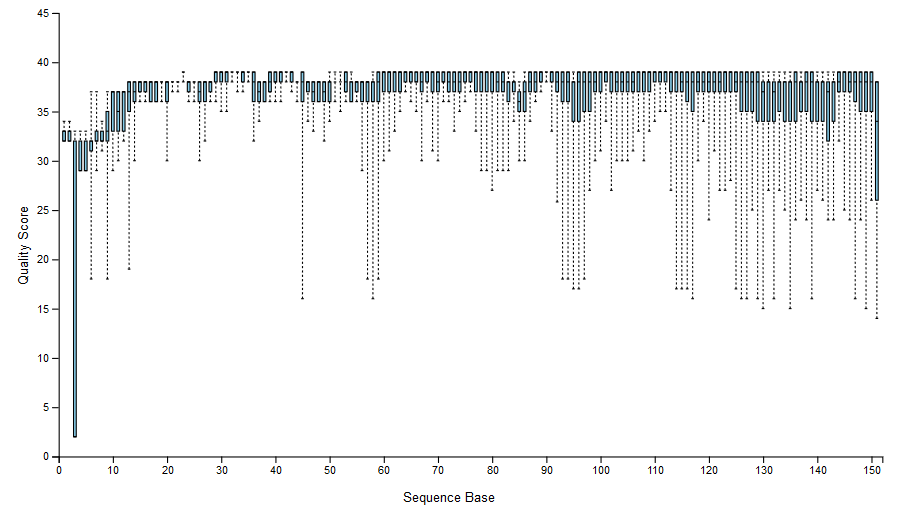

    Qualities look good, can proceed with 150 bp trim in deblur

In [5]:
qiime deblur denoise-16S /
--i-demultiplexed-seqs demux-r1.qza /
--p-trim-length 150 /
--p-sample-stats /
--o-representative-sequences Wombat-GIT-rep-seqs.qza /
--o-table Wombat-GIT-table.qza /
--o-stats Wombat-GIT-deblur-stats.qza /
--verbose /
--p-jobs-to-start 6

Saved FeatureTable[Frequency] to: Wombat-GIT-table.qza
Saved FeatureData[Sequence] to: Wombat-GIT-rep-seqs.qza
Saved DeblurStats to: Wombat-GIT-deblur-stats.qza
(qiime2-2020.6) 

: 1

In [6]:
qiime metadata tabulate /
--m-input-file Wombat-GIT-rep-seqs.qza /
--o-visualization Wombat-GIT-rep-seqs.qzv

Saved Visualization to: Wombat-GIT-rep-seqs.qzv
(qiime2-2020.6) 

: 1

In [7]:
qiime feature-table summarize /
--i-table Wombat-GIT-table.qza /
--o-visualization Wombat-GIT-table.qzv

Saved Visualization to: Wombat-GIT-table.qzv
(qiime2-2020.6) 

: 1

### Assign taxonomy using a naive bayesian classifier against the SILVA 138 v4 database:

In [ ]:
qiime feature-classifier classify-sklearn /
--i-reads Wombat-GIT-rep-seqs.qza /
--i-classifier silva-138-99-515-806-nb-classifier.qza /
--o-classification Wombat-GIT-SILVA-138.qza /
--p-n-jobs 24

In [10]:
qiime metadata tabulate \
--m-input-file Wombat-GIT-SILVA-138.qza \
--o-visualization Wombat-GIT-SILVA-138.qzv

Saved Visualization to: Wombat-GIT-SILVA-138.qzv
(qiime2-2020.6) 

: 1

### Create a phylogenetic tree using SEPP: 

In [ ]:
qiime fragment-insertion sepp \
--i-representative-sequences Wombat-GIT-rep-seqs.qza \
--i-reference-database sepp-refs-silva-128.qza \
--o-tree Wombat-GIT-sepp-tree.qza \
--o-placements Wombat-GIT-sepp-placements.qza \
--verbose \
--p-threads 24 

### Filter out features that couldn't be inserted on tree:

In [8]:
qiime fragment-insertion filter-features \
  --i-table Wombat-GIT-table.qza \
  --i-tree Wombat-GIT-sepp-tree.qza \
  --o-filtered-table Wombat-GIT-filtered_table.qza \
  --o-removed-table Wombat-GIT-removed_table.qza \
  --verbose

Saved FeatureTable[Frequency] to: Wombat-GIT-filtered_table.qza
Saved FeatureTable[Frequency] to: Wombat-GIT-removed_table.qza
(qiime2-2020.6) 

: 1

In [9]:
qiime feature-table summarize \
--i-table Wombat-GIT-removed_table.qza \
--o-visualization Wombat-GIT-removed_table.qzv

Saved Visualization to: Wombat-GIT-removed_table.qzv
(qiime2-2020.6) 

: 1

### Looks like nothing was removed, so will just use the unfiltered table (table.qza) for subsequent analyses.

### Run alpha-rarefaction analysis to see what a good sampling depth will be:

In [12]:
qiime diversity alpha-rarefaction \
--i-table Wombat-GIT-table.qza \
--m-metadata-file Wombat-GIT-Metadata.txt \
--o-visualization Wombat-GIT-table-rarefaction.qzv \
--p-min-depth 500 \
--p-max-depth 50000

Saved Visualization to: Wombat-GIT-table-rarefaction.qzv
(qiime2-2020.6) 

: 1

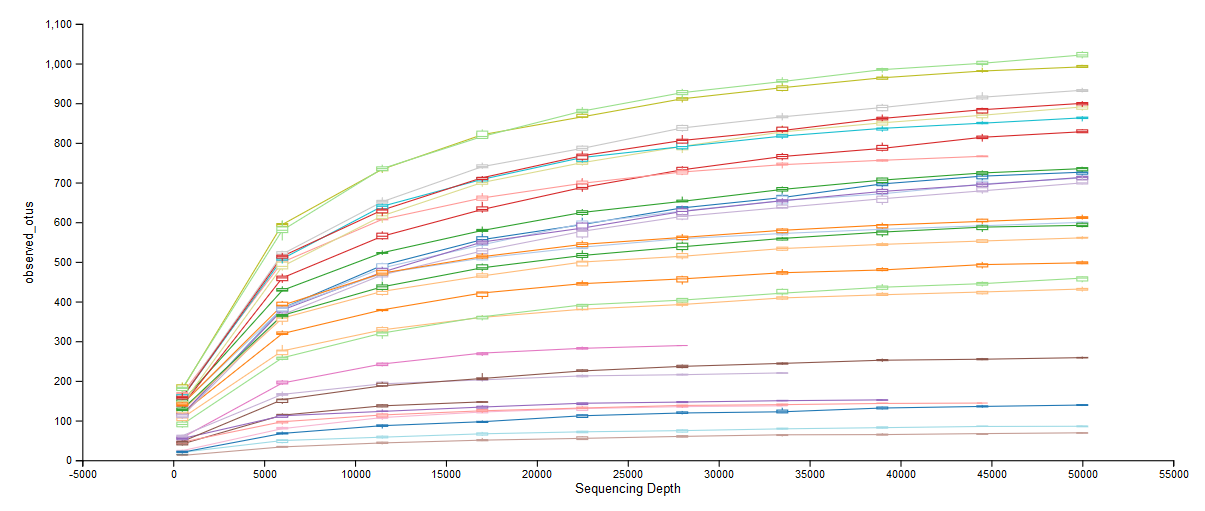

### diversity seems to plateau ~ 20k reads. Sample with lowest # of reads is BNW-SI-A: 21,909

### Core diversity analyses:

In [24]:
qiime diversity core-metrics-phylogenetic \
--i-table Wombat-GIT-table.qza \
--i-phylogeny Wombat-GIT-sepp-tree.qza \
--p-sampling-depth 21909 \
--m-metadata-file Wombat-GIT-Metadata.txt \
--output-dir Wombat-GIT-Core-metrics-21909

Saved FeatureTable[Frequency] to: Wombat-GIT-Core-metrics-21909/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Wombat-GIT-Core-metrics-21909/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Wombat-GIT-Core-metrics-21909/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Wombat-GIT-Core-metrics-21909/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Wombat-GIT-Core-metrics-21909/evenness_vector.qza
Saved DistanceMatrix to: Wombat-GIT-Core-metrics-21909/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Wombat-GIT-Core-metrics-21909/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Wombat-GIT-Core-metrics-21909/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Wombat-GIT-Core-metrics-21909/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Wombat-GIT-Core-metrics-21909/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: Wombat-GIT-Core-metrics-21909/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: Wombat-GI

: 1

In [25]:
for i in Wombat-GIT-Core-metrics-21909/*vector.qza; 
do qiime diversity alpha-group-significance \
--i-alpha-diversity $i \
--m-metadata-file Wombat-GIT-Metadata.txt \
--o-visualization ${i/.qza/.qzv}; 
done

Saved Visualization to: Wombat-GIT-Core-metrics-21909/evenness_vector.qzv
Saved Visualization to: Wombat-GIT-Core-metrics-21909/faith_pd_vector.qzv
Saved Visualization to: Wombat-GIT-Core-metrics-21909/observed_features_vector.qzv
Saved Visualization to: Wombat-GIT-Core-metrics-21909/shannon_vector.qzv
(qiime2-2020.6) 

: 1